# Ujian Tengah Semester (5)

Nama   : Clarence Chandra Sentosa

NRP  : 1973010

# Classification dengan KNN (K Nearest Neighbours)

- KNN adalah model machine learning yang dapat digunakan untuk melakukan prediksi berdasarkan kedekatan karakteristik dengan sejumlah tetangga terdekat.
- Prediksi yang dilakukan dapat diterapkan baik pada classification maupun regression tasks.
- Pada pemecahan kasus kali ini, saya akan mencoba memprediksi harga rumah berdasarkan pada dataset boston house pricing dengan penerapan KNN untuk classification tasks.

# Load Boston Dataset

Seperti biasa, saya akan meload terlebih dahulu boston dataset yang akan dipakai untuk proses prediksi kali ini.

In [24]:
# Code 01

from sklearn.datasets import load_boston
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

# Sample Dataset

Pada tahapan ini, saya akan mencoba menyiapkan sample dataset untuk diprediksi yang mengacu pada data boston house pricing.

In [25]:
# Code 02

import pandas as pd

house = {
    'jk': [2, 2, 3, 5, 4, 6, 6],
    'type': [1, 2, 2, 2, 3, 4, 4],
    'harga' : ['sedang', 'sedang', 'tinggi', 'tinggi', 'tinggi', 'tinggi', 'tinggi']
}

house_df = pd.DataFrame(house)
house_df

,jk,type,harga
0,2,1,sedang
1,2,2,sedang
2,3,2,tinggi
3,5,2,tinggi
4,4,3,tinggi
5,6,4,tinggi
6,6,4,tinggi


Kali ini saya akan membentuk dataset yang berisi daftar jumlah kamar dan type rumah beserta sejumlah nominal harga rumah, Dataset tersebut akan ditampung ke dalam format Pandas DataFrame

Proses berpikir code 01 :

- Pertama, kita akan mengimport terlebih dahulu modul pandas.
- Lalu berikutnya, menyiapkan suatu variabel yang dalam hal ini adalah 'house' yang digunakan untuk menampung suatu data dictionary, dimana dictionary ini akan menampung 3 buah keys yaitu : jumlah kamar, type, dan harga.
- 'jk' akan berasosiasi dengan daftar jumlah kamar.
- 'type' dan 'harga (proporsional)' akan berasosiasi dengan jumlah lantai pada rumah dan harga rumah.
- Saya memilih features tersebut karena saya menyesuaikan dengan harga rumah pada umumnya berdasarkan jumlah kamar serta tingkatnya.
- Lalu selanjutnya, dictionary ini akan kita tampung ke dalam suatu variabel dengan nama 'house'.
- Dictionary sensus akan dibentuk menjadi suatu Pandas DataFrame. Oleh karena itu, kita panggil dengan 'pd.DataFrame(house)'.
- Lalu objek DataFramenya, kita tampung ke dalam variabel 'house_df'.
- Kemudian kita tampilkan dengan memanggil 'house_df'.

Adapun tingkatan harga rumah berdasarkan perhitungan menurut pendapat saya yaitu :
- Rumah dengan harga sedang memiliki harga pada kisaran 300 juta sampai 700 juta.
- Rumah dengan harga tinggi memiliki harga pada kisaran lebih dari 700 juta.

Jika kita melihat dataset kita, dataset kita kali ini terdiri dari 3 buah kolom yaitu 'jumlah kamar', 'type rumah' berdasarkan jumlah lantai, serta 'harga rumah'. Pada kali ini, saya akan membentuk model machine learning sederhana yang dapat digunakan untuk memprediksi harga rumah berdasarkan data jumlah kamar dan type (berdasarkan jumlah lantai atau tingkat rumah tersebut). Dengan kata lain, data jumlah kamar dan jumlah lantai atau type rumah akan berperan sebagai features, sedangkan harga akan berperan sebagai target.

# Visualisasi Data

Langkah beriktutnya, saya akan mencoba memvisualisasikan sample dataset yang sudah dibentuk kedalam bentuk scatter plot dimana sumbu x akan berasosisasi dengan jumlah kamar, sedangkan sumbu y akan berasosisasi dengan type atau jumlah lantai atau tingkatan pada rumah.

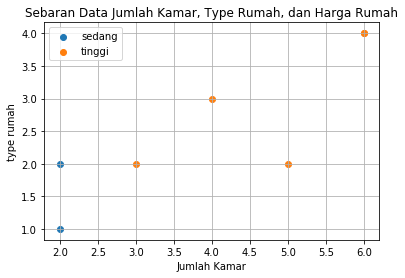

In [26]:
# Code 03

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for harga , d in house_df.groupby('harga'):
    ax.scatter(d['jk'], d['type'], label=harga)
    
plt.legend(loc='upper left')
plt.title('Sebaran Data Jumlah Kamar, Type Rumah, dan Harga Rumah')
plt.xlabel('Jumlah Kamar')
plt.ylabel('type rumah')
plt.grid(True)
plt.show()

Kita akan mencoba visualisasikan dataset sensus yang telah kita bentuk sebelumnya ke dalam scatter plot, dimana sumbu x akan berasosisasi dengan jumlah kamar, sedangkan sumbu y akan berasosisasi dengan type rumah.

Disni kita juga akan menggunakan warna marker yang berbeda untuk merepresentasikan harga rumah harga rumah secara proporsional yaitu marker biru untuk harga rendah, marker orange untuk harga sedang, serta marker hijau untuk harga tinggi.

Proses berpikir code 03 :
- Import modul matplotlib.
- Lalu berikutnya, disini saya akan membentuk subplots, yang dimana akan digunakan untuk menangkap objek figure dan axes nya.
- Selanjutnya, akan dilakukan looping terhadap data house_df tersebut, dimana house_df nya akan digrouping terlebih dahulu berdasarkan 'harga' atau harga rumahnya.
- Pada setiap iterasinya, akan ditangkap 2 nilai yaitu 'jk' yang merepresentasikan jumlah kamar berdasarkan pengelompokannya, dan yang kedua adalah 'd' yang berisi sekumpulan baris data dari kelompok jumlah kamar tertentu. Karena ingin dibentuk scatter plot, maka saya akan panggil 'ax.scatter', dimana sumbu x nya akan diasosiasikan dengan data baris dengan kolom 'jumlah kamar', sedangkan sumbu y akan diasosiasi dengan data baris dengan kolom 'type rumah', lalu akan disertakan juga labelnya, dimana label tersebut akan disesuaikan dengan kelompok proporsi harganya.
- Lalu berikutnya, saya akan menyertakan beberapa keterangan tambahan diantarnya adalah legend, yang akan berasosiasi dengan 'label=harga'. Jika tidak menyertakan parameter 'label', maka legendnya hanya akan menampilkan marker warna saja tanpa disertai keterangannya. 
- Lalu berikutnya, akan melakukan pemanggilan 'plt.legend' juga menyertakan parameter 'loc', parameter 'loc' ini digunakan untuk mengatur lokasi atau posisi dari legendnya, yang dalam kasus ini 'loc' nya sebagai upper left, berarti posisinya ada di sudut kiri atas.
- Selanjutnya, sebagai data tambahan disini akan disertakan judul, label untuk sumbu x dan juga sumbu y 'plt.title', 'plt.xlabel', 'plt.ylabel'.
- Selain itu, juga akan disertakan 'plt.grid' yang diberi nilai true.
- Terakhir, memanggil 'plt.show' untuk memunculkan hasil ploting tersebut.

Jika menghitung jumlah markernya berdasarkan hasil output code 03, berjumlah 5 marker, kelima marker tersebut akan berasosiasi dengan setiap baris dari dataset yang digunakan dalam kasus kali ini (pada code 02), bisa dilihat bahwa dalam pandas dataframe kali ini memiliki 5 buah entries atau row atau instances. Oleh karena itu, setiap baris ini akan menghasilkan satu data point pada scatter plot nya. Bisa kita lihat, bahwa data kelima harga rumah tersebut berbeda-beda atau unique.

Pada kali ini, tujuan utamanya adalah ketika ditemukan suatu data point baru, maka data point tersebut akan coba diprediksi apakah dia masuk kedalam kategori rendah, sedang, dan tinggi.

# Classification Dengan KNN

Setelah konteks dataset dan juga permasalahannya dipahami, maka selanjutnya saya akan mencoba menerapkan KNN atau Key Nearest Neighbours untuk melakukan klasifikasi harga rumah berdasarkan data jumlah kamar dan tingkatnya. Sesuai dengan namanya, model machine learning yang satu ini akan melakukan prediksi yang dalam kasus ini adalah prediksi harga rumah berdasarkan kemiripan karakteristik atau features dengan dataset yang tersedia. 

# Preprocessing Dataset

Sebelum melangkah kepada proses training model, perlu dilakukannya beberapa penyesuaian pada dataset sensus tersebut, dimana akan dikonversikan data jumlah kamar dan type rumah berdasarkan tingkatannya ke dalam numpy array. Selanjutnya akan ditampung ke dalam variabel 'X_train' sebagai sekumpulan features untuk training set. Lalu untuk kolom 'harga' juga akan dikonversikan menjadi numpy array untuk selanjutnya akan ditampung ke dalam variabel 'y_train' sebagai sekumpulan nilai target untuk training set.

In [27]:
# Code 04

import numpy as np

X_train = np.array(house_df[['jk', 'type']])
y_train = np.array(house_df['harga'])

print(f'X_train:\n{X_train}\n')
print(f'y_train: {y_train}')

X_train:
[[2 1]
 [2 2]
 [3 2]
 [5 2]
 [4 3]
 [6 4]
 [6 4]]

y_train: ['sedang' 'sedang' 'tinggi' 'tinggi' 'tinggi' 'tinggi' 'tinggi']


Sebelum kita melangkah kepada proses training model, kita perlu melakukan beberapa penyesuaian pada dataset sensus tersebut, dimana kita akan mengkonversikan data jumlah kamar dan type rumah ke dalam numpy array. Selanjutnya kita tampung ke dalam variabel 'X_train' sebagai sekumpulan features untuk training set. Lalu untuk kolom 'harga' juga kita akan konversikan menjadi numpy array untuk selanjutnya kita tampung ke dalam variabel 'y_train' sebagai sekumpulan nilai target untuk training set.

Proses berpikir code 04 :
- Pertama-tama, saya akan import numpy as np.
- Lalu saya akan bentuk 2 buah numpy array. Untuk numpy array yang pertama akan saya bentuk berdasarkan kolom jumlah kamar dan type rumah dari 'house_df' yang ditampung ke dalam variabel 'X_train', sedangkan numpy array kedua akan dibentuk berdasarkan kolom 'jk' dari 'house_df' yang akan ditampung ke dalam variabel 'y_train'.
- Lalu ditampilkan dengan cara di print kedua variabel tersebut.

Berdasarkan output code 04, X_train berisi sekumpulan nilai features, sedangkan y_train akan berisi sekumpulan nilai target. Jika kita perhatikan pada output code 04 sekumpulan nilai features untuk training set yang dimiliki sudah dalam format array dua dimensi dan tipe datanya pun sudah berupa data numerik, artinya sekumpulan nilai features ini sudah siap digunakan untuk proses training. Tetapi jika kita perhatikan nilai targetnya, tipe datanya berupa string. Sebenarnya untuk kasus classification dengan KNN, target dengan tipe data string tetap bisa diproses dengan baik, hanya saja kita akan menghadapi kendala ketika kita ketika kita melakukan evaluasi model. Oleh karena itu, pada kasus ini saya akan mengkonversikan nilai string menjadi nilai numerik.

Karena harga ini hanya terdiri dari 2 nilai, dalam kasus ini adalah 'sedang' dan 'tinggi', maka kita bisa memanfaatkan label binarizer untuk melakukan konversi nilai string tersebut menjadi numerik biner (lihat pada code 04).

In [28]:
# Code 05

from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
print(f'y_train:\n{y_train}')

y_train:
[[0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]


Proses berpikir code 05 :
- Memanfaatkan class preprocessing yang disertakan oleh SkLearn yaitu LabelBinarizer. Oleh karena itu pertama-tama, lakukan import modul ('from sklearn.preprocessing import LabelBinarizer').
- Lalu berikutnya, akan dicoba membentuk objek dari class label binarizer tersebut, dengan cara memanggil ('lb = LabelBinarizer()') yang akan ditampung ke dalam variabel 'lb'.
- Selanjutnya, objek label binarizer tersebut akan saya manfaatkan untuk melakukan transformasi data yang terdapat dalam variabel 'y_train'. Oleh karena itu, kita akan panggil ('lb.fit_transform(y_train)') yang nilainya kita tampung kembali ke dalam variabel 'y_train'.
- Terakhir akan dilakukan print out terhadap variabel 'y_train'.

Pada output tersebut hanya terdapat 2 nilai yaitu 0 dan 1. Dalam hal ini nilai nol akan merepresentasikan data sedang, sedangkan nilai satu akan merepresentasikan data tinggi.

Pada output code 05 tersebut, setelah melalui proses transformasi data dengan label binarizer, sekumpulan nilai target yang dimiliki, sekarang tersimpan dalam format array 2 dimensi. Oleh karena itu, kita perlu kembalikan menjadi array satu dimensi dengan method flatten (pada code 06).

In [29]:
# Code 06

y_train = y_train.flatten()
print(f'y_train: {y_train}')

y_train: [0 0 1 1 1 1 1]


Proses berpikir code 06 :
- Memanggil fungsi 'y_train.flatten()' yang akan ditampung ke dalam variabel y_train.
- Lakukan pemanggilan dengan print untuk melihat hasilnya.  


# Training KNN Classification Model

Setelah training setnya dipersiapkan, selanjutnya akan lanjut kepada langkah melakukan pemrosesan training model. Kali ini model machine learning yang akan saya gunakan adalah KNN.

In [30]:
# Code 07

from sklearn.neighbors import KNeighborsClassifier

K = 3
model = KNeighborsClassifier(n_neighbors=K)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Proses berpikir code 07 :
- Pertama-tama akan saya import terlebih dahulu estimater class nya 'from sklearn.neighbors import KNeighborsClassifier'. Disini kita memilih KNeighbors Classifier karena kita akan menggunakan KNN ini untuk clasification task.
- Disini terdapat satu parameter yang harus kita spesifikasikan nilainya yaitu paremeter 'K'. Untuk kasus kali ini nilai 'K' yang akan set sebagai 3. Nilai parameter 'K' ini digunakan untuk menentukan jumlah tetangga terdekat yang akan dilibatkan untuk proses prediksi, dan untuk kasus kali ini adalah 3 tetangga terdekat.
- Setelah nilai 'K' kita tentukan, selanjutnya akan dibentuk objek dari class KNeighbors Classifier. KNeighbors Classifier ini akan membutuhkan satu parameter yaitu n_neighbors yang kita beri nilai 'K' lalu ditampung kedalam variabel 'model'.
- Untuk selanjutnya, akan melakukan training dengan memanfaatkan X_train dan y_train yang sudah dipersiapkan sebelumnya.
- Pada kali ini, proses trainingnya akan dilakukan dengan cara memanggil 'model.fit(X_train, y_train)'

Setelah modelnya kita training (lihat pada output code 07), maka status dari model ini adalah train model atau model yang sudah di training. Pada kali ini, proses trainingnya terbilang cepat  karena ukuran data set dimiliki juga terbilang sangat kecil.

# Prediksi Harga Rumah

Setelah model KNN Classifier nya kita training, tahapan selanjutnya saya akan menggunakan train model ini untuk melakukan prediksi harga rumah berdasarkan jumlah kamar dan tingkatnya. Disini kita akan mempersiapkan terlebih dahulu data baru yang akan saya pergunakan untuk melalkukan proses prediksi.

In [31]:
# Code 08

jumlah_kamar = 4
type_rumah = 3
X_new = np.array([jumlah_kamar, type_rumah]).reshape(1, -1)
X_new

array([[4, 3]])

Proses berpikir code 08 :
- Disini semisal saja memiliki data jumlah_kamar sebesar 4 dan type rumah atau tingkat rumah sebesar 3 yang akan kita prediksi harganya apakah sedang atau tinggi.
- Pada kali ini, nilai featuresnya harus dibentuk terlebih dulu menjadi suatu numpy array. Oleh karenanya, disini saya panggil 'np.array' lalu saya bundle jumlah kamar dan berat type rumah '([jumlah_kamar, type_rumah])'. Karena disini hanya terdapat satu dataset atau instance saja, maka perlu melakukan reshape menjadi array 2 dimensi 'reshape(1, -1)'. Lalu array ini akan ditanpung ke dalam variabel 'X_new'.
- Lalu terkahir akan dicoba untuk ditampilkan.

Bisa dilihat pada outputnya (code 08), array nya adalah array 2 dimensi dimana jumlah barisnya adalah satu dan jumlah kolom nya adalah dua.

Setelah data tinggi dan berat badanny siap, selanjutnya akan dilakukan proses prediksi harga rumah dengan memanfaatkan model KNN Classifier yang sudah ditraining sebelumnya (lihat pada code 09). 

In [32]:
# Code 09

y_new = model.predict(X_new)
y_new

array([1])

Proses berpikir code 09 :
-  Memanggil fungsi 'model.predict' lalu kita sertakan '(X_new)' nya dimana hasil prediksinya akan kita tampung kedalam variabel 'y_new'.
- Lalu kita tampilkan pada layar.

Berdasarkan hasil output code 09, bisa disimpulkan bahwa jumlah kamar 4 dan type rumah 3, ini akan diprediksi memiliki harga [1]. 

In [33]:
# Code 10

lb.inverse_transform(y_new)

array(['tinggi'], dtype='<U6')

Output code 10 merupakan hasil konversi baliknya, disini bisa diketahui bahwa nilai 1 untuk target itu berkolerasi dengan tinggi atau dengan kata lain, rumah dengan jumlah kamar 4 dan memiliki 3 lantai tersebut diprediksi sebagai data 'tinggi' oleh model yang sudah ditraining sebelumnya. 

# Visualisasi Nearest Neighbour

Untuk dapat memahami cara kerja KNN dengan lebih baik, akan dicoba untuk memvisualisasikan posisi data baru tadi terhadap sekumpulan data jumlah kamar dan type rumah yang digunakan sebelumnya untuk training model KNN.

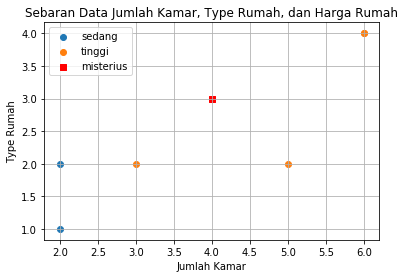

In [34]:
# Code 11

fig, ax = plt.subplots()
for jk, d in house_df.groupby('harga'):
    ax.scatter(d['jk'], d['type'], label=jk)

plt.scatter(jumlah_kamar,
           type_rumah,
           marker='s',
           color='red',
           label='misterius')

plt.legend(loc='upper left')
plt.title('Sebaran Data Jumlah Kamar, Type Rumah, dan Harga Rumah')
plt.xlabel('Jumlah Kamar')
plt.ylabel('Type Rumah')
plt.grid(True)
plt.show()

Proses berpikir code 11 :
- Tidak perlu mengimport matplotlib karena cukup sekali saja.
- Memanggil 'plt.subplots()' untuk mendapatkan objek figure dan axes nya.
- Lalu berikutnya, akan dicoba untuk menampilkan kembali data points dari dataset yang dimiliki. 
- Caranya kurang lebih sama dengan cara sebelumnya, hanya saja disini kita akan menyertakan marker baru pada scatter plot. Marker baru ini dihasilkan dengan memanggil  'plt.scatter' dimana nilai x nya itu berasal dari variabel Jumlah Kamar dan nilai y nya berasal dari type rumah, sedangkan untuk  markernya kita beri nilai 's' karena bentuk markernya sebagai square atau kotak. Lalu untuk colour diberikan warna merah 'red', dan labelnya diberi nama label 'misterius'.

# Kalkulasi Distance (Euclidean Distance)

$distance = \sqrt{(t_1 - t_2)^2  + (b_1 - b_2)^2 }$

Euclidean distance digunakan untuk mengukur jarak antara satu data ponit dengan data point lainnya. 

Untuk selanjutnya, sejumlah K data point dengan jarak terdekat inilah yang akan digunakan oleh KNN sebagai nearest neighbors atau tetangga terdekatnya.

Penjelasan rumus Euclidean Distance :
- t : merepresentasikan tinggi badan.
- b : merepresentasikan berat badan.
- t1 : merepresentasikan data tinggi badan dari data point yang pertama.
- t2 : merepresentasikan data tinggi badan dari data point yang kedua.
- b1 : merepresentasikan data berat badan dari data point yang pertama. 
- b2 : merepresentasikan data berat badan dari data point yang kedua.

Formula atau rumus tersebut dapat digunakan untuk mengukur jarak atau distance atau kedekatan antara data point pertama dengan data point kedua.

Selanjutnya, saya akan mencoba untuk melakukan proses kalkulasi yang diterapkan oleh KNN dalam menentukan tetangga terdekat untuk suatu data point yang akan diprediksi.

In [35]:
# Code 12

misterius = np.array([jumlah_kamar, type_rumah])
misterius

array([4, 3])

In [36]:
# Code 13

X_train

array([[2, 1],
       [2, 2],
       [3, 2],
       [5, 2],
       [4, 3],
       [6, 4],
       [6, 4]], dtype=int64)

In [37]:
# Code 14

from scipy.spatial.distance import euclidean

data_jarak = [euclidean(misterius, d) for d in X_train]
data_jarak

[2.8284271247461903,
 2.23606797749979,
 1.4142135623730951,
 1.4142135623730951,
 0.0,
 2.23606797749979,
 2.23606797749979]

In [38]:
# Code 15

house_df['jarak'] = data_jarak
house_df.sort_values(['jarak'])

,jk,type,harga,jarak
4,4,3,tinggi,0.000000
2,3,2,tinggi,1.414214
3,5,2,tinggi,1.414214
1,2,2,sedang,2.236068
5,6,4,tinggi,2.236068
6,6,4,tinggi,2.236068
0,2,1,sedang,2.828427


Proses berpikir code 12-15:
- Pertama, data point misterius tersebut akan saya akan bentuk terlebih dahulu ke dalam format numpy array 'np.array([jumlah_kamar, type_rumah])'.
- Lalu selanjutnya akan ditampung ke dalam variabel misterius.
- Lalu berikutnya (pada code 13), akan menampilkan sekumpulan nilai features dari training set. Berdasarkan hasil output code 13, saya akan mencoba hitung jarak berdasarkan euclidean distance antara data point misterius (hasil output code 12) dengan setiap data point lain pada dataset 'X_train' (hasil output code 13).
- Untuk menghitung jarak antara keduanya, saya akan gunakan function euclidean yang sudah disertakan pada scipy (pada code 14).
- Caranya cukup mudah, hanya tinggal memanggil method atau function 'from scipy.spatial.distance import euclidean'.
- Lalu berikutnya tinggal dipakai saja euclidean distancenya. Pada code 14 baris code kedua, funtion euclidean system tersebut digunakan untuk mengukur jarak atau kedekatan atau distancenya antara data point misterius dengan suatu data point lain (dalam kasus ini adalah 'd') di dalam variabel 'X_train' yang ditampung ke dalam variabel 'data_jarak'.
- Kemudian tampilkan ke layar.
- Pada hasil output code 14, kita bisa melihat bahwa jarak antara data point misterius dengan data point pertama pada 'X_train' (4) adalah (0.000000) dan seterusnya.
- Selanjutnya untuk mempermudah proses pengamatan, saya akan membentuk kolom baru pada 'house_df' dengan memanfaatkan data jarak pada hasil output 14 (perhatikan pada code 15). Oleh karena itu, selanjutnya hanya tinggal memanggil 'house_df['jarak'] = data_jarak' artinya disini akan membentuk kolom  baru pada house df dengan nama jarak, lalu datanya saya ambil dari variabel 'data_jarak' (pada code 14)
- Untuk selanjutnya, DataFrame 'house_df' ini akan diurutkan nilainya berdasarkan kolom jarak. Dalam hal ini, pengurutan dilakukan secara ascending artinya dari nilai terkecil sampe yang terbesar (lihat pada code 15)
- Pada hasil output code 15, bisa dilihat bahwa datanya sudah terurut berdasarkan kolom jarak. Karena untuk kasus kita kali ini nilai 'k' nya adalah 3, maka akan hanya memperhatikan 3 data point dengan jarak terdekat atau jarak terkecil dengan data point misterius yang dimiliki. Oleh karenanya, bisa dilihat pada output code 15 juga, bahwa 3 baris pertama merupakan 3 neighbor terdekat yang akan menjadi perhatikan untuk melakukan proses prediksi.
- Untuk neigbor pertama, harganya adalah tinggi, neighbor kedua harganya adalah tinggi, dan neighbor yang ketiga harganya adalah tinggi.
- Berdasarkan data neighbors tersebut, makan nilai KNN akan memprediksi data point misterius tersebut sebagai data harga dengan harga tinggi.

# Evaluasi KNN Classification Model

Setelah memahami memanfaatkan KNN untuk menyeeleksi tetangga terdekat, selanjutnya ada beberapa matriks yang bisa digunakan untuk mmengukur performa dari model machine learning untuk kasus classification task dengan menyiapkan terlebih dahulu testing set nya.

In [39]:
# Code 16

X_test = np.array([[2, 1], [1, 1], [3, 2], [4, 3]])
y_test = lb.transform(np.array(['sedang', 'sedang', 'tinggi', 'tinggi'])).flatten()

print(f'X_test:\n{X_test}\n')
print(f'y_test:\n{y_test}')

X_test:
[[2 1]
 [1 1]
 [3 2]
 [4 3]]

y_test:
[0 0 1 1]


Proses berpikir code 16 :
- Code tersebut berupa testing set, dimana testing set tersebut terdiri dari 4 data point. Oleh karena itu, saya disni akan menyiapkan numpy array yang terdiri dari 4 baris dan 2 kolom sebagai 'X_test'.
- Lalu berikutnya, disini saya akan menyiapkan target yang terdiri dari 4 data yaitu 'sedang', 'sedang', 'tinggi', 'tinggi' yang harus ditransformasikan menjadi nilai numerik biner dengan memanfaatkan label binarizer dengan memanggil 'lb.transform' yang akan menghasilkan array 2 dimensi, padahal yang kita harapkan untuk 'y_test'adalah array 1 dimensi. Oleh karena itu, disini perlu untuk  memanggil method flatten.
- Jika dilihat pada hasil outputnya sudah sesuai dengan harapan yang dimana X_test nya terdiri dari sekumpulan nilai numerik yang di bundle atau dikemas sebagai array 2 dimensi. Demikian juga nilai y_test nya yang terdiri dari sekumpulan nilai numerik biner pada kasus kali ini yang di bundle dalam suatu numpy array satu dimensi.

# Prediksi Terhadap Testing Set

In [40]:
# Code 17

y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1])

Setelah testing setnya siap (pada code 16), selanjutnya akan dilakukannya prediksi terhadap testing set tersebut dengan memanfaatkan model KNN Classifier yang sudah ditraining sebelumnya.

Proses berpikir code 17 :
- Memanggil 'model.predict(X_test)' yang diprediksi adalah nilai X_test nya yang akan ditampung ke dalam variabel y_pred.
- Lalu saya akan panggil kembali fungsi tersebut untuk melihat hasilnya.

Bisa kita lihat pada hasil output code 17, nilai yang diharapkan adalah nilai yang ada di dalam y_test (lihat pada output code 16), dimana [0, 0, 1, 1] sedangkan model prediksi yang diperoleh (pada code 16) adalah [0, 0, 0, 1] yang ditampung kedalam variabel y_pred. Untuk fase evaluasi, pada intinya adalah untuk membandingkan nilai y_test (pada output code 16) dengan nilai y_pred nya (pada output code 17).

# Accuracy

Matriks evaluasi pertama yang akan saya coba adalah accuracy. Akurasi adalah proprosi dari instance pada training set yang diklasifikasikan secara benar atau yang berhasil diprediksi dengan tepat.

$accuracy  =  \frac{tp + tn}{tp + tn + fp + fn}$ 

Perhatikan pada rumus accuracy :
- tp = true positive
- tn = true negative
- fp = false postive
- fn = false negative

True postif dan truen negatif merepresentasikan hasil prediksi atau klasifikasi yang benar. True postive berarti sesuatu yang bernilai positif telah dengan tepat diprediksi sebagai positif oleh model, sedangkan true negative berarti sesuatu yang bernilai negatif telah dengan tepat diprediksi sebagai sesuatu yang negatif oleh model.

Jika mengacu pada kasus tersebut, true positif berarti model sudah dengan tepat memprediksi data sedang sebagai harga sedang dan data tinggi sebagai harga tinggi, sedangkan true negatif berarti model sudah dengan tepat memprediksi sebagai data sedang sebagai bukan tinggi dan data tinnggi sebagai bukan sedang.

Dua istilah berikutnya adalah false positive dan false negative, keduanya merepresentasikan hasil prediksi atau klasifikasi yang salah. False positive berarti sesuatu yang bernilai negatif telah keliru diprediksi sebagai positif oleh model. Sedangkan false negative, berarti sesuatu yang bernilai postif telah keliru diprediksi sebagai negatif oleh model atau jika mengacu pada kasus tersebut, false positif berarti model sudah dengan keliru memprediksi data tinggi sebagai sedang dan data sedang sebagai tinggi, sedangkan false negative berarti model sudah dengan keliru memprediksi data sedang sebagai bukan sedang dan data tinggi sebagai bukan tinggi.

In [41]:
# Code 18

from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)

print(f'Accuracy: {acc}')

Accuracy: 0.75


Code 18 merupakan tahapan menggunakan matriks accuracy untuk melakukan evaluasi model machine learning pada SKLearn.

Proses berpikir code 18 :
- Memangil method 'from sklearn.metrics import accuracy_score'.
- Lalu cara pemanfaatannya cukup sederhana, tinggal memanggil saja 'accuracy_score' dengan menyertakan 2 buah parameter. Parameter pertama adalah 'y_test' dan parameter kedua adalah 'y_pred'. 'y_test' merupakan target dari testing set, sedangkan 'y_pred' merupakan hasil prediksi untuk target dari testing setnya, lalu nilai akurasi ini kita tampung ke dalam variabel acc.
- Lalu tampilkan ke layar.

Bisa kita lihat pada output code 18, nilai akurasinya adalah 0.75 atau ddengan kata lain nilai akurasinya adalah 75%.

# Precission

Matrik evaluasi kedua yang akan dipakai adalah precission. Presisi adalah proporsi dari tetsing set yang diprediksi sebagai positif oleh model, yang memang benar-benar positif.  

$precission  =  \frac{tp}{tp  \ + \  fp}$

Perhatikan pada rumus atau formula precission :
- tp : merepresentasikan nilai true positive.
- fp : merepresentasikan nilai false positive.

Selanjutnya akan mencoba untuk melakukan tahapan matrix precision tersebut untuk melakukan evaluasi model machine learning pada SKLearn (perhatikan pada code 19).

In [42]:
# Code 19

from sklearn.metrics import precision_score

prec = precision_score(y_test, y_pred)

print(f'Precission: {prec}')

Precission: 1.0


Proses berpikir code 19 :
- Pertama, akan diimport terlebih dahulu precision score nya dengan cara 'from sklearn.metrics import precision_score'.
- Lalu untuk menggunakannya sama seperti cara menggunakan evaluation matrix yang lainnya, hanya cukup memanggil 'precision_score(y_test, y_pred)', disini menyertakan nilai 'y_test' dan juga 'y_pred' sebagai parameternya. 
- Lalu hasilnya akan ditampung ke dalam variabel 'prec'.
- Kemudian tampilkan dengan cara print.

Bisa kita lihat pada hasil output code 19, bahwa nilai precissionnya adalah 1.0 sekian atau disini bisa dibilang bahwa nilai precisionnya adalah 0,1%.

# Recall

Recall adalah proporsi dari data pada testing set yang memang benar-benar positif yang diprediksi sebagai positif oleh model tersedia.

$recall  =  \frac{tp}{tp + fn}$

Perhatikan pada formula atau rumus recall :
- tp : merepresentasikan nilai true positive.
- fn : merepresentasikan nilai false negative.

In [43]:
# Code 20

from sklearn.metrics import recall_score

rec = recall_score(y_test, y_pred)

print(f'Recall: {rec}')

Recall: 0.5


Proses berpikir code 20 :
- Pertama, mengimport 'from sklearn.metrics import recall_score'
- Lalu pemanfaatannya, tinggal memanggil 'rec = recall_score(y_test, y_pred)'. Seperti biasa nilai 'y_test' dan 'y_pred' merupakan parameternya, yang ditampung ke dalam variabel 'rec'.
- Terakhir ditampilkan dengan print.

Berdasarkan output code 20, nilai recall nya adalah 0.5 yang merupakan nilai tertinggi atau dengan kata lain, nilai recall nya adalah 50%.

# F1 Score

Metriks selanjutnya yang akan digunakan adalah F1 Score.

F1 score  yaitu f1 score merupakan harmonik mean atau nilai rata-rata harmonik dari percision dan recall. 

$F1  =  2 \ \times \ \frac{precision \ \times \ recall}{precision \ + \ recall}$

In [44]:
# Code 21

from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)

print(f'F1-score: {f1}')

F1-score: 0.6666666666666666


Proses berpikir code 21 :
- Pertama-tama saya akan mengimport terlebih dahulu 'from sklearn.metrics import f1_score'.
- Lalu untuk menggunakannya juga sama, hanya tinggal memanggil 'f1 = f1_score(y_test, y_pred)' dimana 'y_test' dan 'y_pred' sebagai parameternya yang akan saya tampung ke dalam variabel 'f1'.
- Terakhir tampilkan pada layar hasilnya.

Berdasarkan output code 21, memeroleh f1-score nya adalah 0.666.


# Classification Report

Keempat matriks yang sudah dilakukan sebelumnya, juga bisa ditampilkan secara keseluruhan sebagai classification report. Sesuai dengan namanya, keempat matriks tersebut memang digunakan untuk mengukur performa model pada classification task.  

Berikutnya saya akan mencoba cara untuk menampilkan classification report dengan memanfaatkan SKlearn (perhatikan pada code 22). 

In [45]:
# Code 22

from sklearn.metrics import classification_report

cls_report = classification_report(y_test, y_pred)

print(f'Classification Report :\n{cls_report}')

Classification Report :
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



Proses berpikir code 22 :
- Pertama, saya akan panggil dengan menggunakan 'from sklearn.metrics import classification_report'.
- Lalu pemanfaatannya juga sama dengan matriks yang lainnya, hanya tinggal memanggil 'classification_report(y_test, y_pred)', dimana 'y_test' dan 'y_pred' merupakan parameternya yang akan ditampung ke dalam variabel 'cls_report.
- Terakhir, tampilkan ke layar dengan print.

Bisa kita lihat pada output code 22, dilihat nilai precision, recall, dan f1-score dan juga bisa dilihat pengklasifikasiannya. Keempat matriks evaluasi yang dipelajari ini ditunjukan untuk binary classifier, dimana berapa pun banyaknya jumlah class atau kelompok nilai yang terdapat pada targets tetap akan diasumsikan sebagai dua kelompok nilai saja yaitu positif atau negatif.

Disini nilai biner satu akan dipandang sebagai nilai positif secara deafult, sedangkan nilai biner 0 akan dipandang sebagai nilai negatif.

Classification report yang ditampilkan pada output code 22 mencankup nilai presicion recall dan f1-score untuk keseluruhan kelas baik yang bernilai 0 maupun 1. Oleh karena itu, sebaiknya menggunakan classification report daripada melakukan pengukuran precision, recall, serta f1-score secara terpisah. Selain itu, classification report juga menampilkan nilai rata-rata untuk precision, recall, dan f1-score.

# Matthews Correlation Coefficient (MCC)

Metriks evaluasi kelima yang akan digunakan adalah matthews correlation coefficient atau yang biasa disingkat menjadi MCC.

- MCC is an alternative to the F1 score for measuring the performance of binary classifiers. Dalam bahasa indonesia, bisa bilang bahwa mcc merupakan alternatif untuk f1-score yang digunakan untuk keperluan pengukuran performa dari binary classifier.
- A perfect classifier's MCC is 1. Dalam terjemahan bahasa indonesia, artinya nilai tertingginya adalah satu. 
- A trivial classifier that predicts randomly will score 0, and a perfectly wrong classifier will score -1. Dalam bahasa indonesia yaitu jika prediksinya dilakukan secara random atau acak dan asal maka nilai scorenya adalah 0, atau jika model classifier nya benar-benar kacau maka akan menghasilkan nilai -1. Oleh karena itu, nilai rentan MCC ini dimulai dari -1 untuk kondisi terburuk sampai dengan 1 untuk kondisi terbaiknya.

$MCC = \frac{tp \ \times \ tn + fp \ \times \ fn}{\sqrt{(tp + fp) \ \times \ (tp + fn) \ \times \ (tn + fp) \ \times \ (tn + fn)}}$

In [46]:
# Code 23

from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_pred)

print(f'MCC: {mcc}')

MCC: 0.5773502691896258


Pada code 23 merupakan cara atau tahapan menggunakan mcc untuk melakukan evaluasi model machine learning pada SkLearn.

Proses berpikir code 23 :
- Pertama, memanggil'from sklearn.metrics import matthews_corrcoef'.
- Lalu untuk menggunakan matthews correlation coefficient ini hanya tinggal memanggil saja 'matthews_corrcoef' lalu sertakan parameternya yang dalam hal ini, parameter pertama adalah'y_test' dan parameter kedua adalah 'y_pred' yang kemudian ditampung ke dalam variabel mcc.
- Kemudian tampilkan ke layar dengan cara memanggilnya denga print.

Berdasarkan output code 23, nilai MCC nya adalah 0.5773502691896258.

Demikianlah cara yang digunakan untuk memprediksi boston house pricing dengan memanfaatkan "Classification KNN".

# " Banyak Belajar Biar Bisa Bantu Banyak Orang "

By : Clarence Code Pianist (1973010)